In [1]:
import pandas as pd
import geopandas as gpd
import plotly.graph_objects as go
import os

# read shapefile perc_groen => groenkaart rivm percentage green
df_groen = gpd.read_file('../data/shape/breda_buurten_4326.shp')
df_groen.index = df_groen.BU_NAAM

In [2]:
# load evi data
import pandas as pd
df = pd.read_csv('../data/satdata/evi.csv', index_col=[0], parse_dates=[0]).dropna()
df = df.unstack().reset_index()
df.columns = ['buurt', 'datum', 'evi']
df_evi = df.groupby('buurt').mean()
df_evi.loc['Chassee'] = df_evi.loc['ChassÃ©']
df_evi

,evi
buurt,
Bavel,3060.530772
Belcrum,1543.054919
Biesdonk,2220.788460
Blauwe Kei,2215.151373
Boeimeer,2340.471506
Brabantpark,2279.530398
Buitengebied Bavel,4009.694424
Buitengebied Prinsenbeek,4199.554456
Buitengebied Teteringen,3759.263934


In [3]:
df_groen_evi = df_evi.join(df_groen.perc_groen).dropna()
df_groen_evi

,evi,perc_groen
buurt,,
Bavel,3060.530772,55.925788
Belcrum,1543.054919,25.283203
Biesdonk,2220.788460,43.226776
Blauwe Kei,2215.151373,42.065574
Boeimeer,2340.471506,49.370830
Brabantpark,2279.530398,46.272917
Buitengebied Bavel,4009.694424,79.321258
Buitengebied Prinsenbeek,4199.554456,83.411251
Buitengebied Teteringen,3759.263934,87.063502


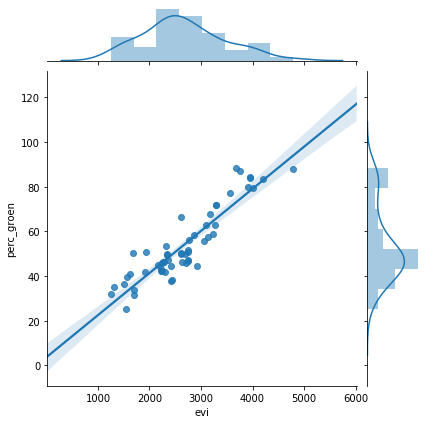

In [4]:
import seaborn as sns
sns.jointplot(x='evi', y='perc_groen', data=df_groen_evi, kind='reg')

In [5]:
import numpy as np
# fit simple ax + b function on data
coefs = np.polyfit(df_groen_evi.perc_groen.values, df_groen_evi.evi.values, deg=1)
xnew = [10,25,50,75,90]
ffit = np.poly1d(coefs)
ffit(xnew) # calculate evi for percentages xnew

array([ 728.80795662, 1389.99689415, 2491.97845669, 3593.96001923,
       4255.14895676])

In [8]:
ffit(20)

1169.6005816392535

In [10]:
ffit(45)

2271.5821441806

In [11]:
xnew
ffit(xnew) * -0.0012 # temp diff
ffit(xnew) * 0.67 # obs diff

array([ 488.30133094,  931.29791908, 1669.62556598, 2407.95321288,
       2850.94980103])

Bij 50% vergroening heb je dus 1670 evi